# KMER rarefraction

In [ ]:
import glob, os
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.optimize import curve_fit
#------------------------------------------

plt.rcParams['svg.fonttype'] = 'none'
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")
read_max=0
colours=["#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20","#002626","#337ca0","#9d8df1","#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20","#002626","#337ca0","#9d8df1","#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20","#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20","#002626","#337ca0","#9d8df1","#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20","#002626","#337ca0","#9d8df1","#679436","#ffd400","#d7907b","#6c4b5e","#87c38f","#c6d8ff","#9b1d20",]

In [1]:
clean_dir=snakemake.params.clean_dir
raw_dir=snakemake.params.raw_dir
qc_dir=snakemake.params.qc_dir

SAMPLES=list(snakemake.params.samples)
forward_tag="_" + snakemake.params.forward_tag
reverse_tag="_" + snakemake.params.reverse_tag

input_histograms=list(snakemake.input.histograms)
illumina_preqc=snakemake.input.preqc_txt
illumina_postqc=snakemake.input.postqc_txt
#------------------------------------------
output_kmer_png=snakemake.output.kmer_png
output_kmer_svg=snakemake.output.kmer_svg
output_kmer_png_fitted=snakemake.output.kmer_fit_png
output_kmer_svg_fitted=snakemake.output.kmer_fit_svg
output_kmer_fit_html=snakemake.output.kmer_fit_html
output_qc_summary_html=snakemake.output.qc_summary_html
output_percentage_kept_reads_png=snakemake.output.percentage_kept_reads_png
output_percentage_kept_reads_svg=snakemake.output.percentage_kept_reads_svg
output_percentage_kept_Mbp_png=snakemake.output.percentage_kept_Mbp_png
output_percentage_kept_Mbp_svg=snakemake.output.percentage_kept_Mbp_svg
output_step_qc_reads_html=snakemake.output.step_qc_reads_html
output_steps_qc_reads_png=snakemake.output.steps_qc_reads_png
output_steps_qc_reads_svg=snakemake.output.steps_qc_reads_svg
output_steps_qc_percentage_png=snakemake.output.steps_qc_percentage_png
output_steps_qc_percentage_svg=snakemake.output.steps_qc_percentage_svg
output_supperdedupper_html=snakemake.output.supperdedupper_html
output_supperdedupper_png=snakemake.output.supperdedupper_png
output_supperdedupper_svg=snakemake.output.supperdedupper_svg

/home/lmf/RUTH/02_CLEAN_DATA/A_000_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_017_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_017b_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_028_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_031_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_043_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_051_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_067_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_091_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_336_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/A_PRE_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_000_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_017_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_028_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_031_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_043_kmer_histogram.tot.csv
/home/lmf/RUTH/02_CLEAN_DATA/B_051_kmer_histogram.tot.csv
/home/lmf/RUT

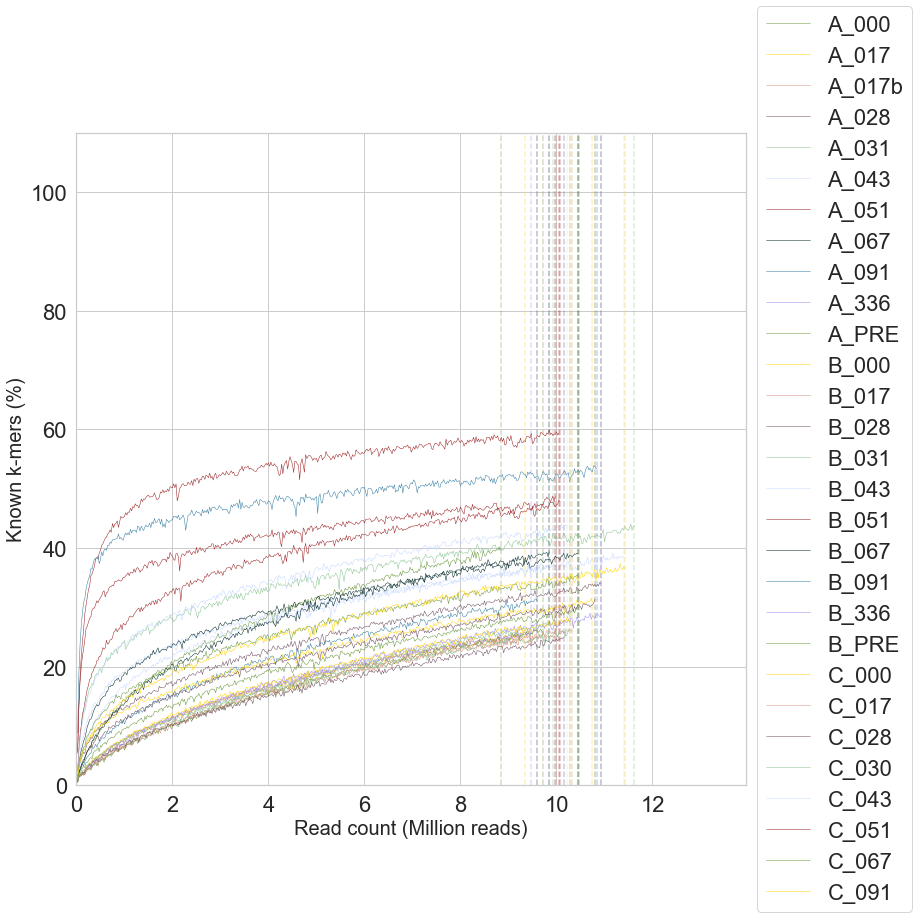

In [2]:
input_histograms.sort()
print(input_histograms)
SAMPLES.sort()
#++++++++++++++++++++++++++++++++++++++++
n=0
for h in input_histograms:
    df=pd.read_csv( h, sep="\t")
    df.columns=["counts", "percent", "c", "d", "e", "f", "g", "h", "rand_cnt", "j"]
    df=df[["counts", "percent"]]
    df["percent"]=(100-df["percent"])
    df["counts"]=df["counts"]/1000000
    ax = sns.lineplot(x="counts", y="percent", data=df,err_style='band',color=colours[n], label=h.split("/")[-1].split("_kmer")[0], linewidth=0.5)
    plt.axvline(df["counts"].max(), 0,1, linestyle="--", color=colours[n], alpha=0.3)
    read_max=max(read_max,df["counts"].max())
    n=n+1
    #print(popt)
ax.set(ylim=(0,110))
ax.set(xlim=(0, read_max*1.2))

ax.set_xlabel("Read count (Million reads)",fontsize=20)
ax.set_ylabel("Known k-mers (%)",fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.figure.savefig(output_kmer_png, format="png", bbox_inches='tight')
ax.figure.savefig(output_kmer_svg, format="svg", bbox_inches='tight')
plt.show()

# KMER rarefraction log fit

354
374


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


384
437
397
394
402


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


418
384
437
419


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


430
413
432
465


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


456
403
394
434


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


379
389


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


411
400
406


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


411
409
399


/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/tmp/ipykernel_57331/4228084702.py:12: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


418
457


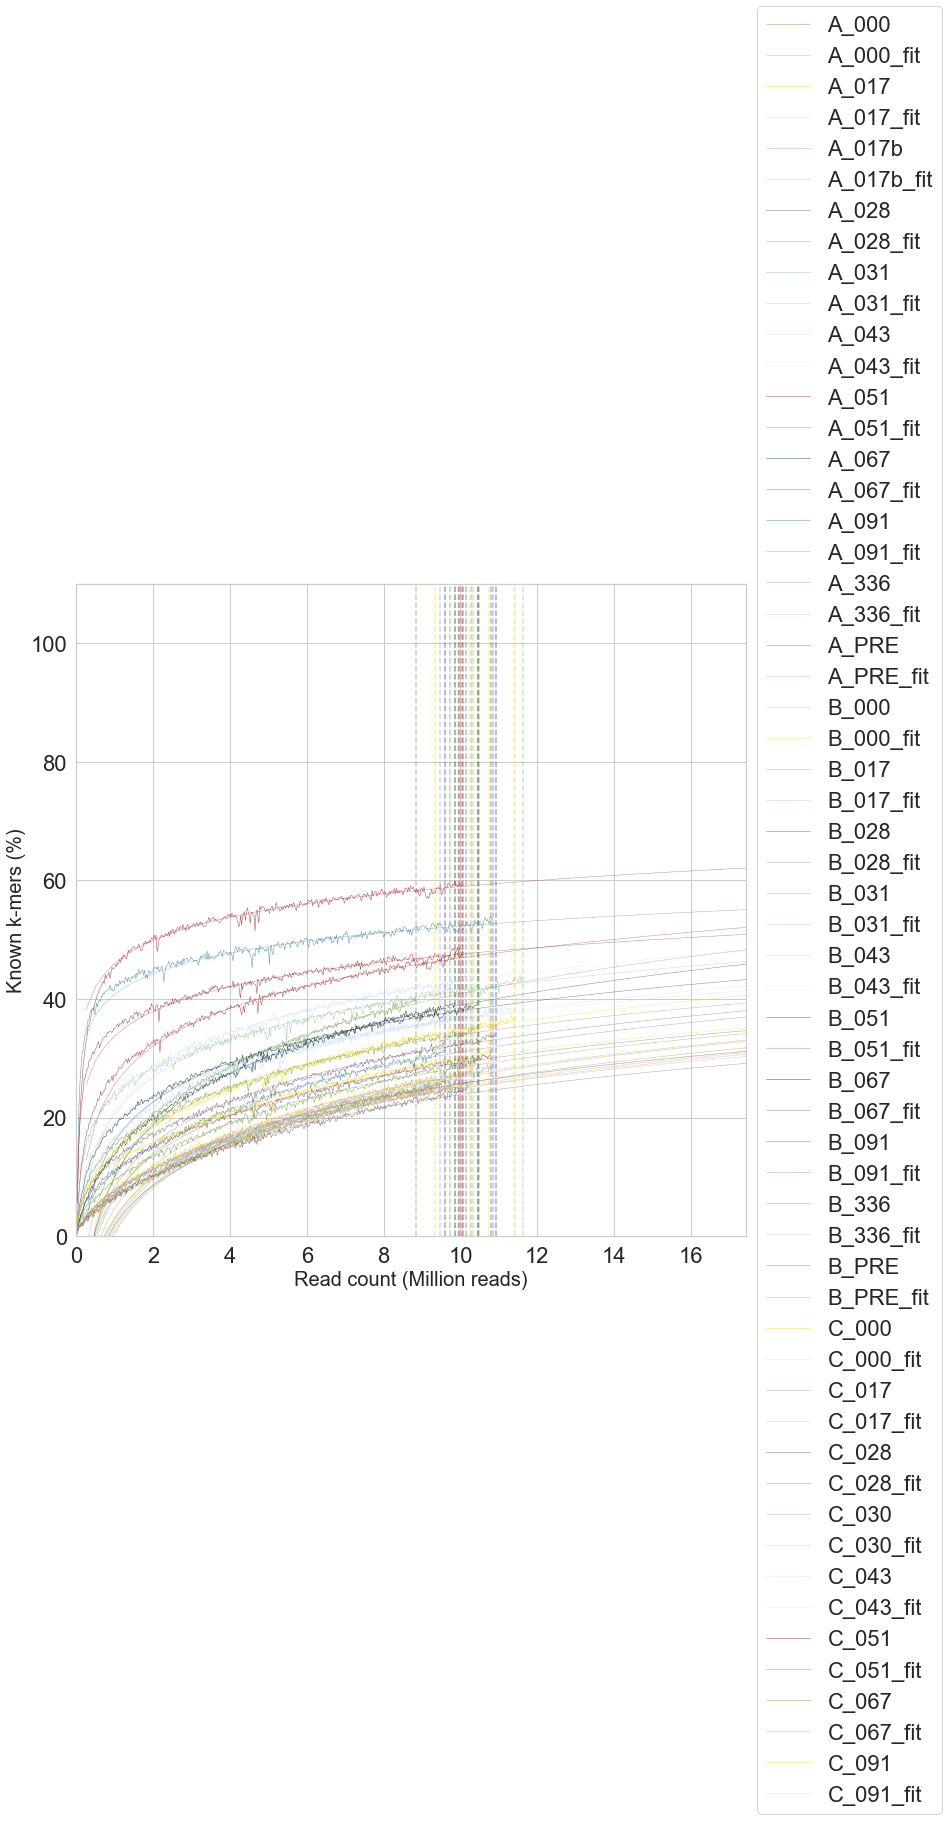

,Sample,a,b,slope,M_reads,b_-_Mreads
0,A_000,10.133416,13.360199,1.509627,8.850000,4.510199
1,A_017,3.005781,9.870139,1.055630,9.350000,0.520139
2,A_017b,3.292351,9.750903,1.015719,9.600000,0.150903
3,A_028,8.404004,10.369151,0.949121,10.925000,-0.555849
4,A_031,0.836293,11.233486,1.131837,9.925000,1.308486
5,A_043,16.598064,8.686625,0.881891,9.850000,-1.163375
6,A_051,46.031221,5.622234,0.559426,10.050000,-4.427766
7,A_067,16.100564,9.512516,0.910289,10.450000,-0.937484
8,A_091,6.603429,10.626545,1.106932,9.600000,1.026545
9,A_336,2.044150,10.867374,0.994725,10.925000,-0.057626


In [3]:
trim_reads=200
trim_reads=100
read_max=0
n=0
samples=[]
a_list=[]
b_list=[]
max_reads=[]
slope_list=[]
#------------------------------------------
def logFunc(x, a, b):
    return a + b*np.log(x)
#------------------------------------------


for h in input_histograms:
    df=pd.read_csv( h, sep="\t")
    df.columns=["counts", "percent", "c", "d", "e", "f", "g", "h", "rand_cnt", "j"]
    df=df[["counts", "percent"]]
    df["percent"]=(100-df["percent"])
    df["counts"]=df["counts"]/1000000
    ax = sns.lineplot(x="counts", y="percent", data=df,err_style='band',color=colours[n], label=h.split("/")[-1].split("_kmer")[0], linewidth=0.5, alpha=0.8)
    read_max=max(read_max,df["counts"].max())
    print(len(df["counts"]))
    if len(df["counts"]) > trim_reads+1:
        popt, pcov = curve_fit(logFunc, df["counts"][trim_reads:], df["percent"][trim_reads:])
        ax = sns.lineplot(x=np.arange(0, trim_reads, 0.25), y=logFunc(np.arange(0, trim_reads, 0.25), *popt),color=colours[n],err_style='band', label=h.split("/")[-1].split("_kmer")[0] + "_fit", linewidth=0.5, alpha=0.5)
        samples.append(h.split("/")[-1].split("_kmer")[0])
        a_list.append(popt[0])
        b_list.append(popt[1])
        max_reads.append(df["counts"].max())
        reads_to_1=((popt[0])/(popt[1]))
        slope_list.append(popt[1]/df["counts"].max())
    plt.axvline(df["counts"].max(), 0,1, linestyle="--", color=colours[n], alpha=0.4)
    n=n+1
    

ax.set(ylim=(0,110))
ax.set(xlim=(0, read_max*1.5))

ax.set_xlabel("Read count (Million reads)",fontsize=20)
ax.set_ylabel("Known k-mers (%)",fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.savefig(output_kmer_png_fitted, format="png", bbox_inches='tight')
ax.figure.savefig(output_kmer_svg_fitted, format="svg", bbox_inches='tight')

stats_df=pd.DataFrame()
stats_df["Sample"]=samples
stats_df["a"]=a_list
stats_df["b"]=b_list
stats_df["slope"]=slope_list
stats_df["M_reads"]=max_reads
stats_df["b_-_Mreads"]=stats_df["b"]-stats_df["M_reads"]

plt.show()

In [ ]:
stats_df.sort_values(by="Sample").style.background_gradient(cmap="RdYlGn")
stats_df_out=stats_df.sort_values(by="Sample").style.background_gradient(cmap="RdYlGn").render()
with open(output_kmer_fit_html,"w") as fp:
    fp.write(stats_df_out)

In [4]:
preqc=pd.read_csv(illumina_preqc, sep="\t")
postqc=pd.read_csv(illumina_postqc, sep="\t")

read_stats_df1=preqc[["Filename","avg_sequence_length", "Total Sequences"]]
read_stats_df1["Mbp"]=read_stats_df1["avg_sequence_length"]*read_stats_df1["Total Sequences"]/1000000
read_stats_df1["Filename"]=read_stats_df1["Filename"].str.split(".fastq").str[0]
# read_stats_df1["Sample"]=read_stats_df1["Filename"].str.split("_R1").str[0]
# read_stats_df1["Sample"]=read_stats_df1["Sample"].str.split("_R2").str[0]
read_stats_df1.columns=["file_pre","length_pre", "number_pre", "Mbp_pre"]

read_stats_df1=read_stats_df1.set_index('file_pre')
read_stats_df1.index = read_stats_df1.index.map("".join)
read_stats_df1

read_stats_df2=postqc[["Filename","avg_sequence_length", "Total Sequences"]]
read_stats_df2["Mbp"]=read_stats_df2["avg_sequence_length"]*read_stats_df2["Total Sequences"]/1000000

read_stats_df2["Filename"]=read_stats_df2["Filename"].str.replace("_forward", "_R1")
read_stats_df2["Filename"]=read_stats_df2["Filename"].str.replace("_reverse", "_R2")
read_stats_df2["Filename"]=read_stats_df2["Filename"].str.replace("_unpaired", "_U")
read_stats_df2["Filename"]=read_stats_df2["Filename"].str.split("_paired").str[0]
read_stats_df2["Filename"]=read_stats_df2["Filename"].str.split("_clean").str[0]

read_stats_df2["Sample"]=read_stats_df2["Filename"].str.rsplit("_",1).str[0]
# read_stats_df2["Sample"]=read_stats_df2["Filename"].str.rsplit("_R2",1).str[0]
# read_stats_df2["Sample"]=read_stats_df2["Filename"].str.rsplit("_U",1).str[0]

read_stats_df2=read_stats_df2.set_index('Filename')
#read_stats_df2.index = read_stats_df2.index.map("".join)

read_stats_df2.columns=["length_post", "number_post", "Mbp_post", "sample"]
read_stats_df3=read_stats_df1.merge(read_stats_df2, left_index=True, right_index=True, how="outer")
read_stats_df3=read_stats_df3.fillna(0)
read_stats_df3


/tmp/ipykernel_57331/2195068320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_stats_df1["Mbp"]=read_stats_df1["avg_sequence_length"]*read_stats_df1["Total Sequences"]/1000000
/tmp/ipykernel_57331/2195068320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  read_stats_df1["Filename"]=read_stats_df1["Filename"].str.split(".fastq").str[0]
/tmp/ipykernel_57331/2195068320.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,length_pre,number_pre,Mbp_pre,length_post,number_post,Mbp_post,sample
A_000_R1,150.0,11247933.0,1687.18995,138.067949,8873049.0,1225.083677,A_000
A_000_R2,150.0,11247933.0,1687.18995,137.404279,8873049.0,1219.194897,A_000
A_000_U,0.0,0.0,0.00000,86.850649,1707452.0,148.293314,A_000
A_017_R1,150.0,11542497.0,1731.37455,135.982318,9365031.0,1273.478621,A_017
A_017_R2,150.0,11542497.0,1731.37455,134.961326,9365031.0,1263.916999,A_017
...,...,...,...,...,...,...,...
C_067_R2,150.0,12424583.0,1863.68745,137.181650,10473599.0,1436.785594,C_067
C_067_U,0.0,0.0,0.00000,91.546128,1286943.0,117.814648,C_067
C_091_R1,150.0,13829272.0,2074.39080,138.631646,11435357.0,1585.302366,C_091
C_091_R2,150.0,13829272.0,2074.39080,137.685746,11435357.0,1574.485664,C_091


In [ ]:
preqc

In [6]:
postqc

,Sample,Filename,File type,Encoding,Total Sequences,Sequences flagged as poor quality,Sequence length,%GC,total_deduplicated_percentage,avg_sequence_length,...,per_base_sequence_quality,per_tile_sequence_quality,per_sequence_quality_scores,per_base_sequence_content,per_sequence_gc_content,per_base_n_content,sequence_length_distribution,sequence_duplication_levels,overrepresented_sequences,adapter_content
0,A_000_forward_paired_clean.tot,A_000_forward_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,8873049.0,0.0,50-150,50.0,80.267347,138.067949,...,pass,pass,pass,warn,warn,pass,warn,pass,pass,pass
1,A_000_reverse_paired_clean.tot,A_000_reverse_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,8873049.0,0.0,50-150,50.0,80.259765,137.404279,...,pass,pass,pass,warn,fail,pass,warn,pass,pass,pass
2,A_000_unpaired_clean.tot,A_000_unpaired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,1707452.0,0.0,50-150,50.0,96.158099,86.850649,...,pass,pass,pass,warn,pass,pass,warn,pass,pass,pass
3,A_017_forward_paired_clean.tot,A_017_forward_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,9365031.0,0.0,50-150,46.0,89.025189,135.982318,...,pass,pass,pass,warn,pass,pass,warn,pass,pass,pass
4,A_017_reverse_paired_clean.tot,A_017_reverse_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,9365031.0,0.0,50-150,46.0,89.059163,134.961326,...,pass,pass,pass,fail,pass,pass,warn,pass,pass,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,C_067_reverse_paired_clean.tot,C_067_reverse_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,10473599.0,0.0,50-150,44.0,80.771271,137.181650,...,pass,pass,pass,fail,warn,pass,warn,pass,pass,pass
83,C_067_unpaired_clean.tot,C_067_unpaired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,1286943.0,0.0,50-150,45.0,96.083893,91.546128,...,pass,pass,pass,fail,pass,pass,warn,pass,pass,pass
84,C_091_forward_paired_clean.tot,C_091_forward_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,11435357.0,0.0,50-150,45.0,80.425506,138.631646,...,pass,pass,pass,fail,pass,pass,warn,pass,pass,pass
85,C_091_reverse_paired_clean.tot,C_091_reverse_paired_clean.tot.fastq.gz,Conventional base calls,Sanger / Illumina 1.9,11435357.0,0.0,50-150,45.0,80.487832,137.685746,...,pass,pass,pass,fail,pass,pass,warn,pass,pass,pass


In [7]:
read_stats_df2

,length_post,number_post,Mbp_post,sample
Filename,,,,
A_000_R1,138.067949,8873049.0,1225.083677,A_000
A_000_R2,137.404279,8873049.0,1219.194897,A_000
A_000_U,86.850649,1707452.0,148.293314,A_000
A_017_R1,135.982318,9365031.0,1273.478621,A_017
A_017_R2,134.961326,9365031.0,1263.916999,A_017
...,...,...,...,...
C_067_R2,137.181650,10473599.0,1436.785594,C_067
C_067_U,91.546128,1286943.0,117.814648,C_067
C_091_R1,138.631646,11435357.0,1585.302366,C_091


In [8]:
read_stats_df=read_stats_df3.groupby(["sample"]).sum()
read_stats_df["%number_kept"]=(read_stats_df["number_post"]/read_stats_df["number_pre"]*100).round(2)
read_stats_df["%Mbp_kept"]=(read_stats_df["Mbp_post"]/read_stats_df["Mbp_pre"]*100).round(2)
read_stats_df["%Mbp_removed"]=100-read_stats_df["%Mbp_kept"]
read_stats_df["%number_removed"]=100-read_stats_df["%number_kept"]
read_stats_df.drop(["length_pre","length_post"], axis=1).style.background_gradient(cmap="RdYlGn")
read_stats_df2.to_html(output_qc_summary_html)


,number_pre,Mbp_pre,number_post,Mbp_post,%number_kept,%Mbp_kept,%Mbp_removed,%number_removed
sample,,,,,,,,
A_000,22495866.000000,3374.379900,19453550.000000,2592.571888,86.480000,76.830000,23.170000,13.520000
A_017,23084994.000000,3462.749100,20225143.000000,2670.474761,87.610000,77.120000,22.880000,12.390000
A_017b,23941658.000000,3591.248700,20843987.000000,2762.514398,87.060000,76.920000,23.080000,12.940000
A_028,25036800.000000,3755.520000,22686563.000000,2964.076693,90.610000,78.930000,21.070000,9.390000
A_031,23548038.000000,3532.205700,21096865.000000,2826.534866,89.590000,80.020000,19.980000,10.410000
A_043,24889526.000000,3733.428900,21557223.000000,2904.879095,86.610000,77.810000,22.190000,13.390000
A_051,25188368.000000,3778.255200,21786200.000000,2949.800749,86.490000,78.070000,21.930000,13.510000
A_067,25905942.000000,3885.891300,22624989.000000,3061.981004,87.340000,78.800000,21.200000,12.660000
A_091,23808470.000000,3571.270500,20723336.000000,2709.171415,87.040000,75.860000,24.140000,12.960000


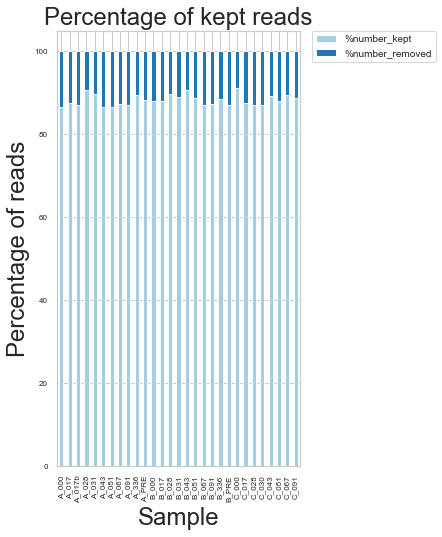

In [9]:
colors = sns.color_palette("Paired", n_colors=2)
fig_width=len(SAMPLES)*.15
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
ax=read_stats_df[["%number_kept","%number_removed"]].plot(kind='bar', stacked=True,colormap=cmap1, figsize=(fig_width,8), fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.xlabel('Sample')
plt.ylabel('Percentage of reads') 
plt.title('Percentage of kept reads')
ax.figure.savefig(output_percentage_kept_reads_png, format="png", bbox_inches='tight')
ax.figure.savefig(output_percentage_kept_reads_svg, format="svg", bbox_inches='tight')

plt.show()


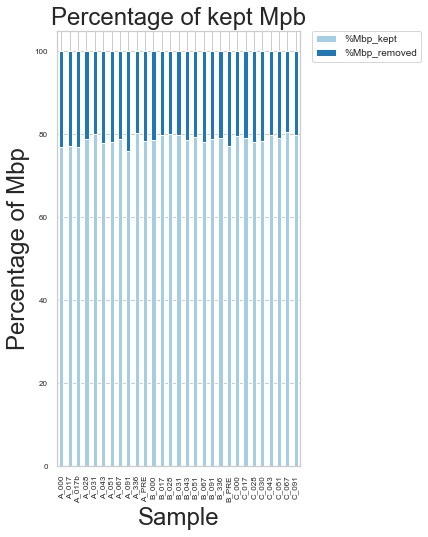

In [10]:
colors = sns.color_palette("Paired", n_colors=2)
fig_width=len(SAMPLES)*.15

cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
ax=read_stats_df[["%Mbp_kept","%Mbp_removed"]].plot(kind='bar', stacked=True,colormap=cmap1, figsize=(fig_width,8), fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10)
plt.xlabel('Sample')
plt.ylabel('Percentage of Mbp') 
plt.title('Percentage of kept Mpb')
ax.figure.savefig(output_percentage_kept_Mbp_png, format="png", bbox_inches='tight')
ax.figure.savefig(output_percentage_kept_Mbp_svg, format="svg", bbox_inches='tight')
plt.show()

In [11]:
import glob, os


sample_l=[]
read_types=[]
raw=[]
trimmed=[]
duk=[]
euk=[]
norm=[]
reads=[]

for sample in (read_stats_df.index.to_list()):  
    sample_l.extend([sample]*3)
    read_types.extend(["R1", "R2", "U"])
    raw.append(int(open(raw_dir + "/" + sample + forward_tag + "_read_count.txt" , 'r').readline().strip()))
    raw.append(int(open(raw_dir + "/" +  sample + reverse_tag + "_read_count.txt" , 'r').readline().strip()))
    raw.append(int(0))

    trimmed.append(int(open(clean_dir + "/" + sample + "_forward_paired_read_count.txt" , 'r').readline().strip()))
    trimmed.append(int(open(clean_dir + "/" + sample + "_reverse_paired_read_count.txt" , 'r').readline().strip()))
    trimmed.append(int(open(clean_dir + "/" + sample + "_merged_unpaired.tot_read_count.txt" , 'r').readline().strip()))
    
    euk.append(int(open(clean_dir + "/" + sample + "_forward_paired_noEuk.tot_read_count.txt" , 'r').readline().strip()))
    euk.append(int(open(clean_dir + "/" + sample + "_reverse_paired_noEuk.tot_read_count.txt" , 'r').readline().strip()))
    euk.append(int(open(clean_dir + "/" + sample + "_unpaired_noEuk.tot_read_count.txt" , 'r').readline().strip()))

    duk.append(int(open(clean_dir + "/" + sample + "_forward_paired_clean.tot_read_count.txt" , 'r').readline().strip()))
    duk.append(int(open(clean_dir + "/" + sample + "_reverse_paired_clean.tot_read_count.txt" , 'r').readline().strip()))
    duk.append(int(open(clean_dir + "/" + sample + "_unpaired_clean.tot_read_count.txt" , 'r').readline().strip()))

    norm.append(int(open(clean_dir + "/" + sample + "_forward_paired_norm.tot_read_count.txt" , 'r').readline().strip()))
    norm.append(int(open(clean_dir + "/" + sample + "_reverse_paired_norm.tot_read_count.txt" , 'r').readline().strip()))
    norm.append(int(open(clean_dir + "/" + sample + "_unpaired_norm.tot_read_count.txt" , 'r').readline().strip()))

df_counts=pd.DataFrame()
df_counts["sample"]=sample_l
df_counts["type"]=read_types
df_counts["raw"]=raw
df_counts["trimmomatic"]=trimmed
df_counts["kraken"]=euk
df_counts["bbduk"]=duk
df_counts["norm"]=norm



df_counts["low_QC_reads_s"]=(df_counts["raw"]-df_counts["trimmomatic"])/1000000
df_counts["eukaryotic_reads_s"]=(df_counts["trimmomatic"]-df_counts["kraken"])/1000000
df_counts["bbduk_phix174_reads_s"]=(df_counts["kraken"]-df_counts["bbduk"])/1000000
df_counts["duplicate_reads_s"]=(df_counts["bbduk"]-df_counts["norm"])/1000000
df_counts["assembly_reads_s"]=(df_counts["norm"])/1000000

df_counts["low_QC_reads_p"]=df_counts["low_QC_reads_s"]/df_counts["raw"]
df_counts["eukaryotic_reads_p"]=df_counts["eukaryotic_reads_s"]/df_counts["raw"]
df_counts["bbduk_phix174_reads_p"]=df_counts["bbduk_phix174_reads_s"]/df_counts["raw"]
df_counts["duplicate_reads_p"]=df_counts["duplicate_reads_s"]/df_counts["raw"]
df_counts["assembly_reads_p"]=df_counts["assembly_reads_s"]/df_counts["raw"]

df_counts["sample_long"]=df_counts["sample"]+ "_" + df_counts["type"]
df_counts.to_html(output_step_qc_reads_html)
df_counts                   

,sample,type,raw,trimmomatic,kraken,bbduk,norm,low_QC_reads_s,eukaryotic_reads_s,bbduk_phix174_reads_s,duplicate_reads_s,assembly_reads_s,low_QC_reads_p,eukaryotic_reads_p,bbduk_phix174_reads_p,duplicate_reads_p,assembly_reads_p,sample_long
0,A_000,R1,11247933,9008968,8873049,8873049,7844635,2.238965,0.135919,0.0,1.028414,7.844635,1.990557e-07,1.208391e-08,0.0,9.143138e-08,6.974290e-07,A_000_R1
1,A_000,R2,11247933,9008968,8873049,8873049,7844635,2.238965,0.135919,0.0,1.028414,7.844635,1.990557e-07,1.208391e-08,0.0,9.143138e-08,6.974290e-07,A_000_R2
2,A_000,U,0,1709305,1707452,1707452,1700533,-1.709305,0.001853,0.0,0.006919,1.700533,-inf,inf,NaN,inf,inf,A_000_U
3,A_017,R1,11542497,9509950,9365031,9365031,8926491,2.032547,0.144919,0.0,0.438540,8.926491,1.760925e-07,1.255526e-08,0.0,3.799351e-08,7.733587e-07,A_017_R1
4,A_017,R2,11542497,9509950,9365031,9365031,8926491,2.032547,0.144919,0.0,0.438540,8.926491,1.760925e-07,1.255526e-08,0.0,3.799351e-08,7.733587e-07,A_017_R2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,C_067,R2,12424583,10655457,10473599,10473599,8936086,1.769126,0.181858,0.0,1.537513,8.936086,1.423892e-07,1.463695e-08,0.0,1.237477e-07,7.192262e-07,C_067_R2
83,C_067,U,0,1288731,1286943,1286943,1280943,-1.288731,0.001788,0.0,0.006000,1.280943,-inf,inf,NaN,inf,inf,C_067_U
84,C_091,R1,13829272,11625013,11435357,11435357,10059085,2.204259,0.189656,0.0,1.376272,10.059085,1.593908e-07,1.371410e-08,0.0,9.951876e-08,7.273763e-07,C_091_R1
85,C_091,R2,13829272,11625013,11435357,11435357,10059085,2.204259,0.189656,0.0,1.376272,10.059085,1.593908e-07,1.371410e-08,0.0,9.951876e-08,7.273763e-07,C_091_R2


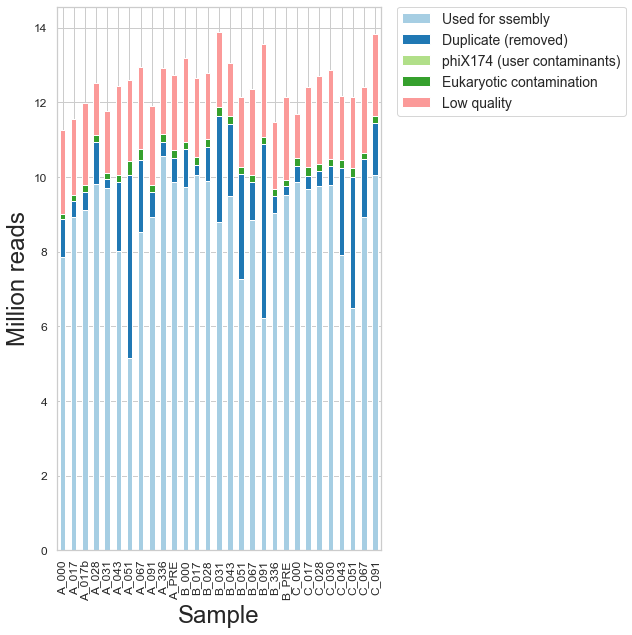

In [12]:
colors = sns.color_palette("Paired", n_colors=5)
fig_width=len(SAMPLES)*.2

legend_text=["Used for ssembly", "Duplicate (removed)", "phiX174 (user contaminants)", "Eukaryotic contamination", "Low quality"]
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
df_counts_paired=df_counts[df_counts["type"]=="R1"]
ax=df_counts_paired.plot(x="sample",y=["assembly_reads_s","duplicate_reads_s", "bbduk_phix174_reads_s", "eukaryotic_reads_s", "low_QC_reads_s"], kind='bar',stacked=True, colormap=cmap1, figsize=(fig_width,10), fontsize=12)
# plt.legend()
plt.legend(legend_text,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
plt.xlabel('Sample')
plt.ylabel('Million reads') 
plt.savefig(output_steps_qc_reads_png, format="png")
plt.savefig(output_steps_qc_reads_svg, format="svg")

plt.show()

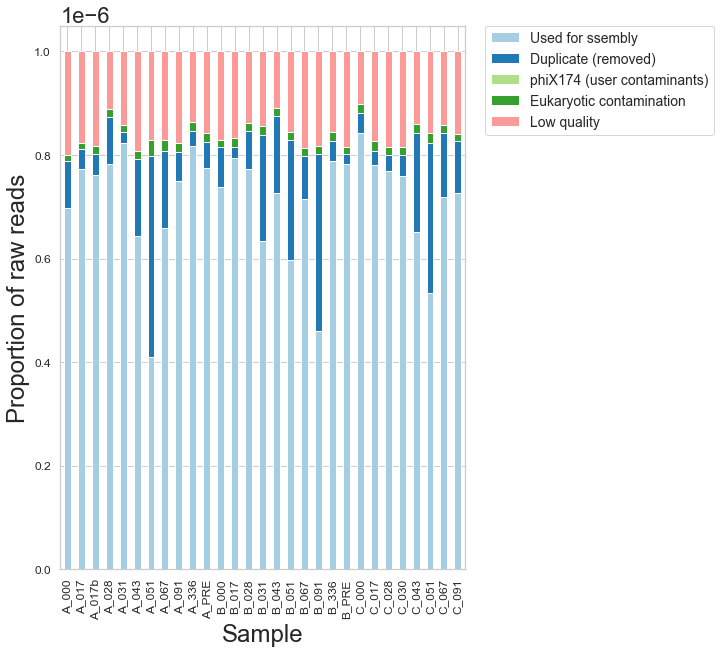

In [13]:
colors = sns.color_palette("Paired", n_colors=5)
fig_width=len(SAMPLES)*.25
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
df_counts_paired=df_counts[df_counts["type"]=="R1"]
ax=df_counts_paired.plot(x="sample",y=["assembly_reads_p","duplicate_reads_p", "bbduk_phix174_reads_p", "eukaryotic_reads_p", "low_QC_reads_p"], kind='bar',stacked=True, colormap=cmap1, figsize=(fig_width,10), fontsize=12)
plt.legend(legend_text,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
plt.xlabel('Sample')
plt.ylabel('Proportion of raw reads') 
plt.savefig(output_steps_qc_percentage_png, format="png")
plt.savefig(output_steps_qc_percentage_svg, format="svg")
plt.show()

In [14]:
df_counts_paired

,sample,type,raw,trimmomatic,kraken,bbduk,norm,low_QC_reads_s,eukaryotic_reads_s,bbduk_phix174_reads_s,duplicate_reads_s,assembly_reads_s,low_QC_reads_p,eukaryotic_reads_p,bbduk_phix174_reads_p,duplicate_reads_p,assembly_reads_p,sample_long
0,A_000,R1,11247933,9008968,8873049,8873049,7844635,2.238965,0.135919,0.0,1.028414,7.844635,1.990557e-07,1.208391e-08,0.0,9.143138e-08,6.974290e-07,A_000_R1
3,A_017,R1,11542497,9509950,9365031,9365031,8926491,2.032547,0.144919,0.0,0.438540,8.926491,1.760925e-07,1.255526e-08,0.0,3.799351e-08,7.733587e-07,A_017_R1
6,A_017b,R1,11970829,9793127,9602626,9602626,9118178,2.177702,0.190501,0.0,0.484448,9.118178,1.819174e-07,1.591377e-08,0.0,4.046904e-08,7.616998e-07,A_017b_R1
9,A_028,R1,12518400,11136586,10929678,10929678,9804342,1.381814,0.206908,0.0,1.125336,9.804342,1.103826e-07,1.652831e-08,0.0,8.989456e-08,7.831945e-07,A_028_R1
12,A_031,R1,11774019,10094471,9944531,9944531,9700612,1.679548,0.149940,0.0,0.243919,9.700612,1.426487e-07,1.273482e-08,0.0,2.071672e-08,8.238998e-07,A_031_R1
15,A_043,R1,12444763,10058781,9869748,9869748,8006769,2.385982,0.189033,0.0,1.862979,8.006769,1.917258e-07,1.518976e-08,0.0,1.496998e-07,6.433846e-07,A_043_R1
18,A_051,R1,12594184,10438010,10054150,10054150,5157551,2.156174,0.383860,0.0,4.896599,5.157551,1.712039e-07,3.047915e-08,0.0,3.887984e-07,4.095185e-07,A_051_R1
21,A_067,R1,12952971,10749725,10460976,10460976,8525149,2.203246,0.288749,0.0,1.935827,8.525149,1.700958e-07,2.229211e-08,0.0,1.494504e-07,6.581617e-07,A_067_R1
24,A_091,R1,11904235,9789331,9601011,9601011,8936202,2.114904,0.188320,0.0,0.664809,8.936202,1.776598e-07,1.581958e-08,0.0,5.584643e-08,7.506742e-07,A_091_R1
27,A_336,R1,12922036,11162567,10938391,10938391,10573634,1.759469,0.224176,0.0,0.364757,10.573634,1.361604e-07,1.734835e-08,0.0,2.822752e-08,8.182638e-07,A_336_R1


,sample,pcr_percent_duplicates
0,A_000,7.201697
1,A_017,3.867725
2,A_017b,3.805868
3,A_028,6.375999
4,A_031,4.130646
5,A_043,7.343563
6,A_051,19.933328
7,A_067,8.006217
8,A_091,4.617878
9,A_336,3.916163


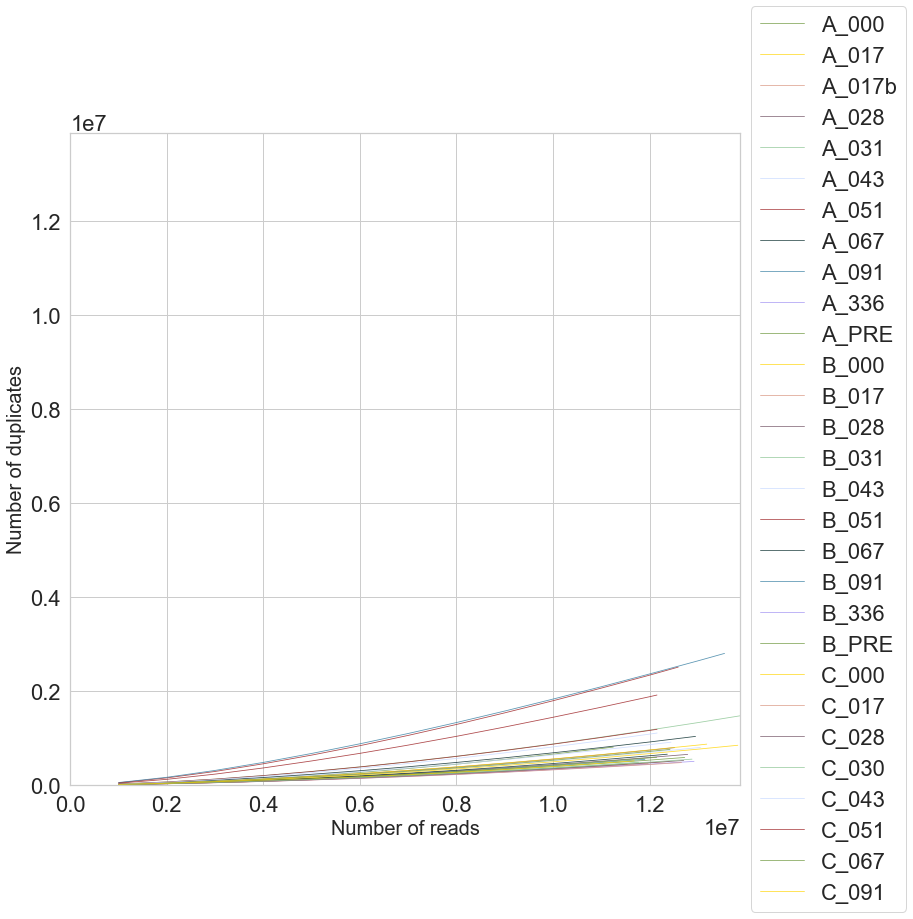

In [15]:
import json
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.set_style("whitegrid")
maxim=0
n=0
percentages=[]
for sample in SAMPLES:   
    f = open(qc_dir + "/" +sample + "_stats_pcr_duplicates.log")
    data=json.load(f)
    df=pd.DataFrame(data[0]["Fragment"]["duplicate_saturation"], columns=["reads","dup"] )
    percentages.append(df.iloc[-1]["dup"]*100/df.iloc[-1]["reads"])
    max_temp=df["reads"].max()
    if max_temp>maxim: maxim=max_temp;
    ax = sns.lineplot(x="reads", y="dup", data=df,err_style='band',color=colours[n], label=sample, linewidth=0.8, alpha=0.8)
    n=n+1

ax.set(ylim=(0,maxim))
ax.set(xlim=(0, maxim))

ax.set_xlabel("Number of reads",fontsize=20)
ax.set_ylabel("Number of duplicates",fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.figure.savefig(output_supperdedupper_png, format="png")
ax.figure.savefig(output_supperdedupper_svg, format="svg")

pcr_dup_df=pd.DataFrame()
pcr_dup_df["sample"]=SAMPLES
pcr_dup_df["pcr_percent_duplicates"]=percentages

pcr_dup_df_out=pcr_dup_df.style.background_gradient(cmap="RdYlGn_r", vmin=0, vmax=100).render()
with open(output_supperdedupper_html,"w") as fp:
    fp.write(pcr_dup_df_out)

pcr_dup_df.style.background_gradient(cmap="RdYlGn_r", vmin=0, vmax=100)


